# Lab04: Clustering

- MSSV: 1712919
- Họ và tên: LÊ VĂN VŨ

## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Sau đó, tạo thư mục có tên `MSSV` của bạn (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) Chép file `Lab04-Clustering.ipynb` vào, rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [8]:
def IndexMin(array):
    min_value=array[0]
    index=0
    for i in range(1,len(array)):
        if array[i]<min_value:
            min_value=array[i]
            index=i
    return index
def Mean_list(array):
    len_X=len(array)
    Z=array[0]
    len_Xi=len(Z)
    AVG=[]
    for i in range(len_Xi):
        AVG.append(0)
    for i in range(len_X):
        Y=array[i]
        for j in range(len(Y)):
            AVG[j]=AVG[j]+Y[j]
    len_AVG=len(AVG)
    for i in range(len_AVG):
        AVG[i]=AVG[i]/len_X
    return AVG


def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    if len(x)!=len(y):
        return -1
    distance=0;
    for i in range(len(x)):
        distance= distance + (x[i]-y[i])**2
    distance=math.sqrt(distance);
    return distance
 

In [9]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):#chon K tam
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
                
    def updateCentroids(self, cur_centroids):

        #cur_centroids: list of new centroids
        self.has_converged=True
        d_centroid=0
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d=0
            for i in range(len(prev_centroid)):
                d=d+(abs(prev_centroid[i]-cur_centroid[i])/prev_centroid[i])
                  
        #quy ve %
        if  d > self.thresold:
            self.has_converged = False
            self.centroids = cur_centroids

    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))#tinh khoang cach tu 1 diem dang xet toi 3 diem

                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    #Xep vao Group?: co khoang cach gan tam nao thi thuoc nhom do
                    c=IndexMin(d_list)

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)

                #new_centroid=np.mean(samples,0)
                new_centroid=Mean_list(samples)
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)
    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))  
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(IndexMin(d_list))
            
        return np.array(pred)


## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [10]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)#gop het
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T#mang 1500 voi 500 la 0 500 la 1...

**Hiển thị dữ liệu trên đồ thị**

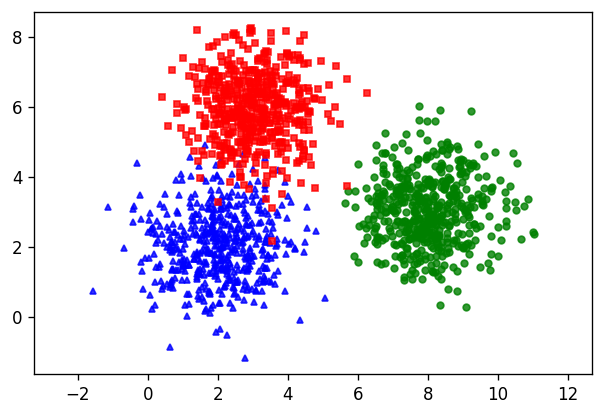

In [11]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


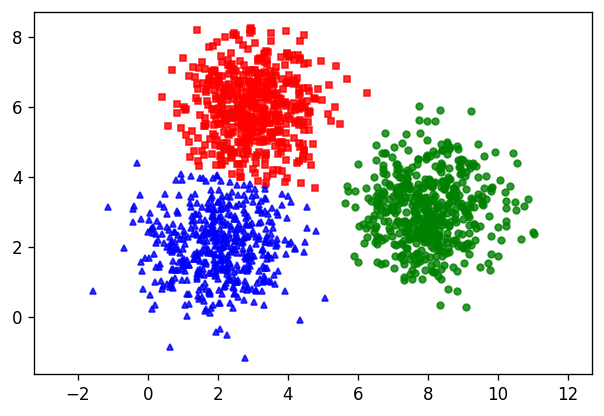

In [12]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


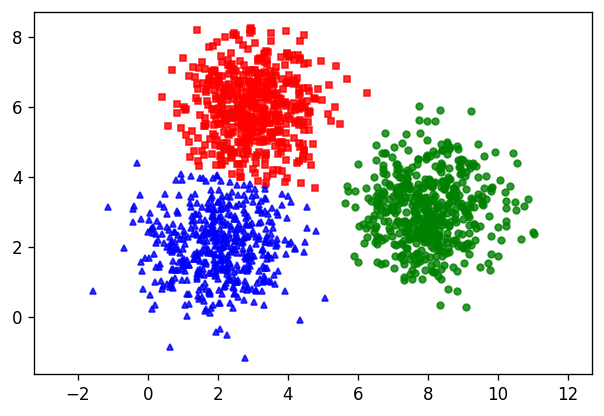

In [13]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [14]:
class k_medois:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):#chon K tam
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        self.Sumcost=10000000000000.0
        #Starting clusters will be random members from X set
        #indexes = np.random.randint(0, len(X)-1,3)#size = 3: 1 1 1 ngau nhien 3 tam--> nen thay la k tam
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
                
    def updateCentroids(self, cur_centroids,SampleAll):#cap nhat lai tam moi lan  Nhóm các đối tượng vào nhóm gần nhất

        #cur_centroids: list of new centroids
        #self.has_converged=True
        prev_centroids=self.centroids
        Sumcost_Prev=0
        Sumcost_New=0
        for i in range(len(SampleAll)):
            Y=SampleAll[i]
            for k in range(len(Y)):
                Sumcost_Prev+=euclidianDistance(prev_centroids[i], Y[k])
                Sumcost_New+=euclidianDistance(cur_centroids[i], Y[k])                
        if  Sumcost_New <  Sumcost_Prev:
            self.centroids = cur_centroids
            self.has_converged = False
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
           
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            SampleAll=[]
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        instance=euclidianDistance(self.centroids[j], X[k])
                        if instance > 0:#khong them medois vao sample
                            d_list.append(instance)#tinh khoang cach tu 1 diem dang xet toi 3 diem
                            
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    #Xep vao Group?: co khoang cach gan tam nao thi thuoc nhom do
                    c=IndexMin(d_list)

                    #Store sample to list
                    if c == centroid:
                        samples.append(list(X[k]))   
                
                #New centroids of each cluster is calculated by random of all samples closest to it
                
                #TODO (new_centroid=???)
                # Chon ngau nhien 1 Op trong tap medois
                SampleAll.append(samples)
                new_centroid=np.random.randint(0, len(samples)-1)
                cur_centroids.append(samples[new_centroid])
                #Them vao ds medois moi    
            self.updateCentroids(cur_centroids,SampleAll)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)
    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))  
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(IndexMin(d_list))
            
        return np.array(pred)

In [15]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)#gop het
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T#mang 1500 voi 500 la 0 500 la 1...

**Thực hiện với thuật toán mà bạn vừa cài đặt:**

Centers found by your model:
[[2.51954527 2.40952237]
 [8.15536734 3.02655797]
 [3.14639964 6.37223922]]


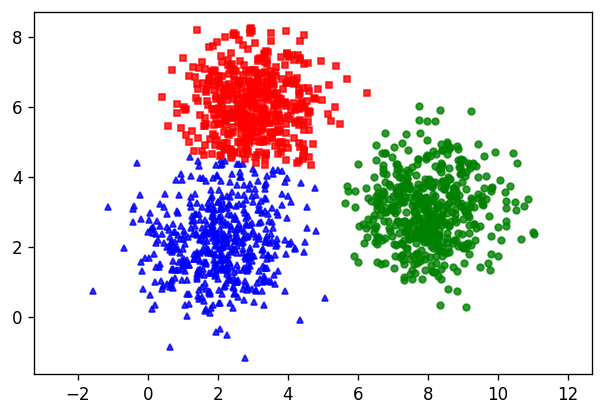

In [16]:
model1=k_medois(k=3)
print('Centers found by your model:')
#print(model1.initCentroids(X))
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)

**Thử lại kết quả với scikit learn:**

In [17]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     \ 1.8MB 1.7MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=1273348 sha256=3c5a166bb38f6500f7b4d0c393d5b6ad2227e09b1eddf027cd821f0225acb44b
  Stored in directory: /tmp/pip-ephem-wheel-cache-whlgt2t1/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


Centers found by scikit-learn:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


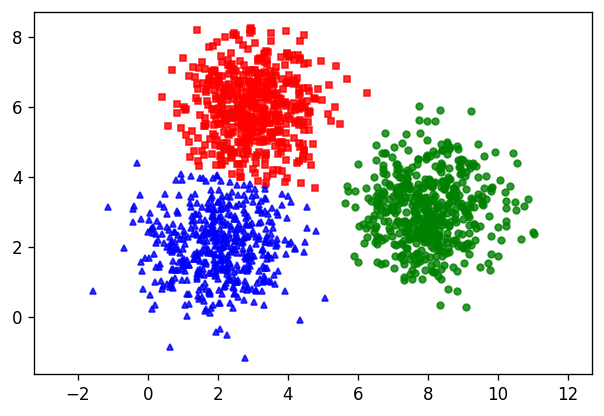

In [18]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmedoids.cluster_centers_)
pred_label = kmedoids.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO:
- Đối với thuật toán K-means tâm cụm có thể có giá trị khác với các giá trị trong tập dữ liệu do lấy trung bình, còn k-medois chọn ngẫu nhiên và tìm cụm ngẫu nhiên trong tập dữ liệu.
- K-means không xử lý tốt đối với các mẫu dữ liệu có tính "cá biệt" như k-medois, mặc khác k-medois lại không hiệu quả cho tập dữ liệu lớn do việc tìm lại tâm cụm dựa vào tính khoảng cách và mang tính ngẫu nhiên, do đó kết quả k-medois có thể khác nhau cho mỗi lần tiến hành gom cụm.
- K-means dễ cày đặt, dễ hiểu dễ theo dõi quá trình cày đặt hơn do k-medois có mang tính chất ngẫu nhiên.
- K-medois là sự cải tiến so với k-means tốt cho việc tìm kiếm địa điểm tối ưu trong việc chọn địa điểm xây dựng 1 công trình do tuân thủ vị trí đã chỉ ra trong tập dữ liệu.



# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [19]:
from sklearn import datasets
iris = datasets.load_iris()

In [20]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

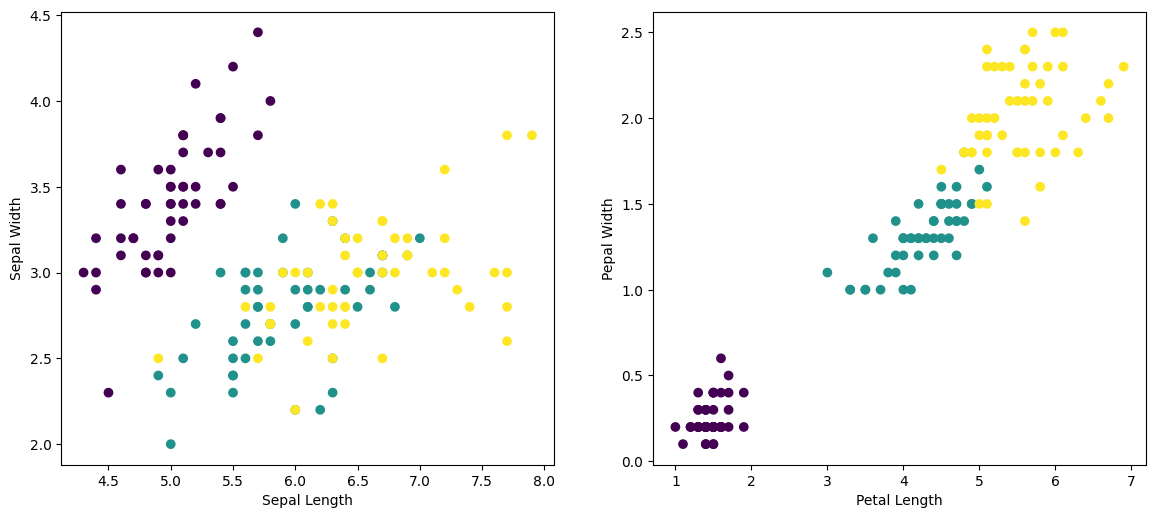

In [21]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

#TODO: 
Dữ liệu có **150 mẫu chia đề cho 3 loại hoa, có 4 thuộc tính** tượng trưng cho 2 đặc điểm: đài hoa và cánh hoa. Mỗi đặc điểm có chiều dài và chiều rộng.
Đối với tập đài hoa có sự phân bố ít cục bộ của 3 nhóm hoa *(Iris setosa, Iris virginica và Iris versicolor) (thông tin từ Wikipedia)*, với loại hoa khác nhau các giá trị thuộc tính đài hoa rất khó phân biệt, sự chênh lệch giá trị không quá lớn có thể phân biệt được loại hoa. Đối với 2 thuộc tính cánh hoa, với mỗi loại hoa có sự chênh lệch tương đối lớn dẫn đến các điểm cụm phân bố cục bộ theo cụm từng loại hoa của nó.


In [22]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[1.38611111 0.24166667]
 [2.09473684 0.45789474]
 [4.98947368 1.71052632]]


Text(0.5, 1.0, 'Predicted')

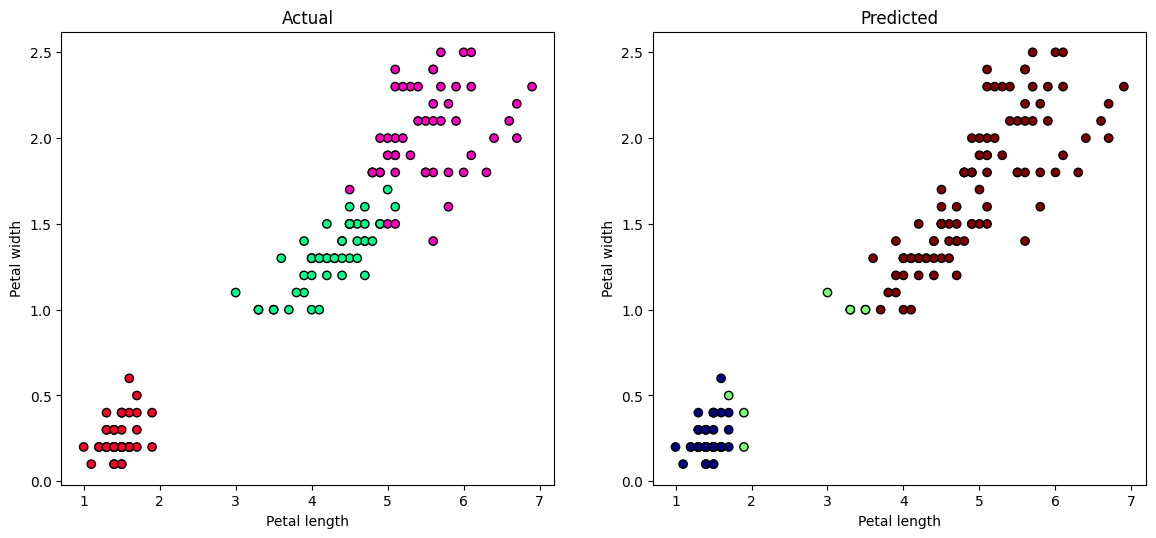

In [23]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:
Tập dữ liệu chọn lọc 2 thuộc tính của cánh hoa được gom thành 2 cụm, có sự phân chia khá rõ ràng. Một số **(tỷ lệ khá lớn)** loại hoa ban đầu thuộc nhóm này, sau khi tiến hành gom cụm một số mẫu sẽ thuộc về loại kia. 



### Thực hiện tương tự với thuật toán K-medois

[[1.4 0.2]
 [4.7 1.5]
 [1.6 0.4]]


Text(0.5, 1.0, 'Predicted')

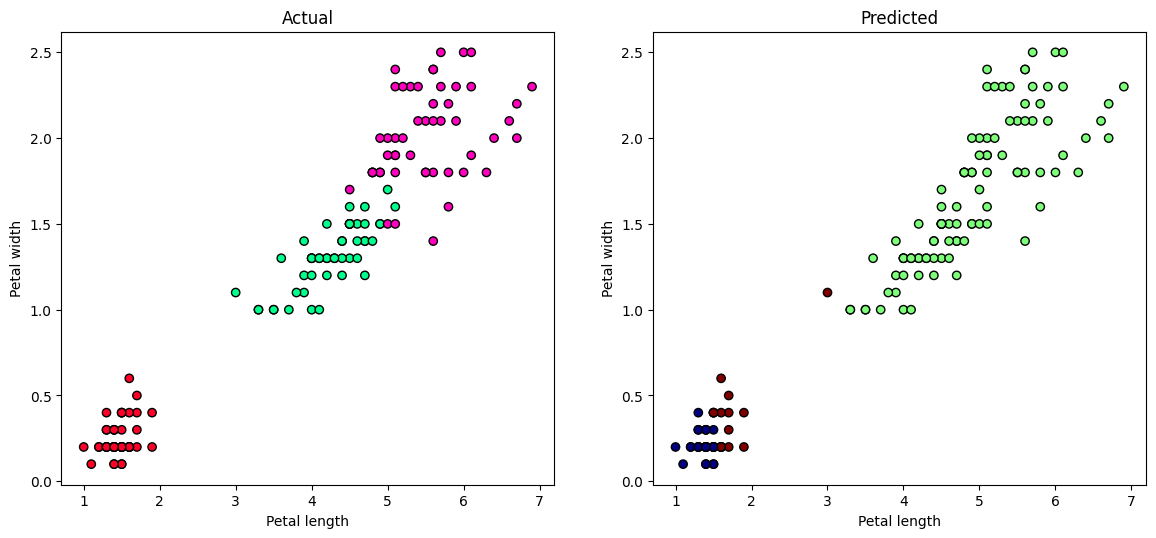

In [24]:
#TODO
D=X[:,2:]
model=k_medois(k=3)
centers = model.fit(D)
print(centers)
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')